In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler


In [154]:
matHealth = pd.read_csv('PAHealth_MaternalChildHealth_20221127.txt').iloc[:, 1:]
print(matHealth.shape)
matHealth.head()


(68, 49)


,County0,MICH-01_2011-2015,MICH-01_2012-2016,MICH-01_2013-2017,MICH-01_2014-2018,MICH-01_2015-2019,MICH-01_MetGoal,MICH-02_2011-2015,MICH-02_2012-2016,MICH-02_2013-2017,...,MICH-10_2013-2017,MICH-10_2014-2018,MICH-10_2015-2019,MICH-10_MetGoal,MICH-13_2011-2015,MICH-13_2012-2016,MICH-13_2013-2017,MICH-13_2014-2018,MICH-13_2015-2019,MICH-13_MetGoal
0,Pennsylvania,6.1,6.1,5.9,5.9,5.9,No,6.5,6.4,6.2,...,87.4,88.2,89.0,No,44.4,43.6,42.8,42.0,39.9,No
1,Adams,4.8,5.3,4.4,6.0,5.9,No,3.8,3.7,4.8,...,85.8,87.0,87.7,No,44.5,41.4,42.6,40.7,36.8,No
2,Allegheny,5.6,5.7,5.4,5.4,5.5,Yes,6.1,6.1,6.1,...,89.0,89.8,90.8,No,31.7,29.4,32.5,32.7,24.7,No
3,Armstrong,4.9,5.6,6.4,6.9,7.9,No,4.6,5.7,5.8,...,76.9,78.1,79.6,No,36.6,34.2,35.6,32.0,30.6,No
4,Beaver,7.6,7.3,6.9,7.3,6.4,No,7.2,6.8,6.6,...,80.9,82.5,83.5,No,41.2,41.8,37.4,39.2,33.8,No


In [155]:
goals_met = matHealth[[m for m in matHealth.columns if 'MetGoal' in m]].replace({'No':0, 'Yes':1})
goals_met['Total_MetGoals'] = goals_met.sum(axis=1)
goals_met.head()

,MICH-01_MetGoal,MICH-02_MetGoal,MICH-03_MetGoal,MICH-06_MetGoal,MICH-07_MetGoal,MICH-08_MetGoal,MICH-10_MetGoal,MICH-13_MetGoal,Total_MetGoals
0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,0,0,2
2,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,2


In [156]:
goals_met['Total_MetGoals'].value_counts()

1    31
0    23
2    14
Name: Total_MetGoals, dtype: int64

In [157]:
cols = ['County0']
cols.extend([m for m in matHealth.columns if '2019' in m])
cols

['County0',
 'MICH-01_2015-2019',
 'MICH-02_2015-2019',
 'MICH-03_2015-2019',
 'MICH-06_2015-2019',
 'MICH-07_2015-2019',
 'MICH-08_2015-2019',
 'MICH-10_2015-2019',
 'MICH-13_2015-2019']

In [158]:
outcomes = matHealth[cols]
outcomes['MetGoals_Reached'] = matHealth['MICH-01_MetGoal'].replace({'Yes': 1, 'No': 0})
outcomes

<ipython-input-158-28fe2685ec72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes['MetGoals_Reached'] = matHealth['MICH-01_MetGoal'].replace({'Yes': 1, 'No': 0})


,County0,MICH-01_2015-2019,MICH-02_2015-2019,MICH-03_2015-2019,MICH-06_2015-2019,MICH-07_2015-2019,MICH-08_2015-2019,MICH-10_2015-2019,MICH-13_2015-2019,MetGoals_Reached
0,Pennsylvania,5.9,6.0,24.3,26.4,9.6,74.7,89.0,39.9,0
1,Adams,5.9,4.7,15.4,23.8,9.4,83.4,87.7,36.8,0
2,Allegheny,5.5,6.0,27.4,28.5,9.9,87.2,90.8,24.7,1
3,Armstrong,7.9,6.3,31.8,28.9,9.7,82.4,79.6,30.6,0
4,Beaver,6.4,7.2,21.8,32.8,8.8,82.3,83.5,33.8,0
...,...,...,...,...,...,...,...,...,...,...
63,Washington,6.2,5.0,26.1,28.6,9.1,77.4,82.8,38.0,0
64,Wayne,DSU,DSU,DSU,24.3,8.8,85.9,83.4,40.7,DSU
65,Westmoreland,5.5,4.8,26.4,27.3,9.1,88.6,84.5,32.7,1
66,Wyoming,12.3,DSU,DSU,23.4,9.7,83.8,76.9,39.2,0


In [159]:
outcomes['MICH-01_2015-2019'] = pd.to_numeric(outcomes['MICH-01_2015-2019'], errors='coerce').astype('float64')
outcomes['MICH-02_2015-2019'] = pd.to_numeric(outcomes['MICH-02_2015-2019'], errors='coerce').astype('float64')
outcomes['MICH-03_2015-2019'] = pd.to_numeric(outcomes['MICH-03_2015-2019'], errors='coerce').astype('float64')
outcomes['MICH-06_2015-2019'] = pd.to_numeric(outcomes['MICH-03_2015-2019'], errors='coerce').astype('float64')
outcomes['MICH-07_2015-2019'] = pd.to_numeric(outcomes['MICH-03_2015-2019'], errors='coerce').astype('float64')
outcomes['MICH-08_2015-2019'] = pd.to_numeric(outcomes['MICH-03_2015-2019'], errors='coerce').astype('float64')
outcomes['MICH-10_2015-2019'] = pd.to_numeric(outcomes['MICH-03_2015-2019'], errors='coerce').astype('float64')
outcomes['MICH-13_2015-2019'] = pd.to_numeric(outcomes['MICH-03_2015-2019'], errors='coerce').astype('float64')

outcomes['MICH-02_2015-2019'] = outcomes['MICH-02_2015-2019'].fillna(outcomes['MICH-02_2015-2019'].mean())
outcomes['MICH-03_2015-2019'] = outcomes['MICH-03_2015-2019'].fillna(outcomes['MICH-03_2015-2019'].mean())
outcomes['MICH-06_2015-2019'] = outcomes['MICH-06_2015-2019'].fillna(outcomes['MICH-06_2015-2019'].mean())
outcomes['MICH-07_2015-2019'] = outcomes['MICH-07_2015-2019'].fillna(outcomes['MICH-07_2015-2019'].mean())
outcomes['MICH-08_2015-2019'] = outcomes['MICH-08_2015-2019'].fillna(outcomes['MICH-08_2015-2019'].mean())
outcomes['MICH-10_2015-2019'] = outcomes['MICH-10_2015-2019'].fillna(outcomes['MICH-10_2015-2019'].mean())
outcomes['MICH-13_2015-2019'] = outcomes['MICH-13_2015-2019'].fillna(outcomes['MICH-13_2015-2019'].mean())


outcomes = outcomes.assign(avg = outcomes.loc[:, ['MICH-01_2015-2019', 'MICH-02_2015-2019', 'MICH-03_2015-2019', 'MICH-06_2015-2019',
                                    'MICH-07_2015-2019', 'MICH-08_2015-2019', 'MICH-10_2015-2019', 'MICH-13_2015-2019']].mean(axis=1))
target = outcomes[['County0', 'avg']]
target

<ipython-input-159-fa1b2ea1ef27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes['MICH-01_2015-2019'] = pd.to_numeric(outcomes['MICH-01_2015-2019'], errors='coerce').astype('float64')
<ipython-input-159-fa1b2ea1ef27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes['MICH-02_2015-2019'] = pd.to_numeric(outcomes['MICH-02_2015-2019'], errors='coerce').astype('float64')
<ipython-input-159-fa1b2ea1ef27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,County0,avg
0,Pennsylvania,19.712500
1,Adams,12.875000
2,Allegheny,21.987500
3,Armstrong,25.625000
4,Beaver,18.050000
...,...,...
63,Washington,20.975000
64,Wayne,24.102396
65,Westmoreland,21.087500
66,Wyoming,22.627096


In [160]:
pa_health = pd.read_csv('health_outcomes.txt')
pa_health

,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,...,gono_per_100000,perc_smoker,hiv_tested,perc_no_healthins,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000,MetGoals_Reached
0,York,449058.0,3.2,21.9,30.1,8.4,74.6,9.9,88.6,60.3,...,89.0,16.0,40.0,8.0,30.0,88.0,1.6,79.8,87.0,0
1,Clinton,38632.0,-1.5,19.5,27.3,6.8,68.8,8.8,82.9,52.5,...,25.8,21.0,33.0,8.0,36.0,89.0,0.6,27.9,19.0,0
2,Susquehanna,40328.0,-7.0,18.4,31.8,7.2,64.2,9.1,78.0,61.4,...,10.7,19.0,42.0,10.0,35.0,88.0,1.2,27.6,33.5,0
3,Northampton,305285.0,2.5,19.8,32.7,8.2,78.2,9.5,89.9,50.9,...,118.7,18.0,45.0,6.0,32.0,89.0,1.1,43.2,44.7,1
4,Jefferson,43425.0,-3.9,21.1,26.4,8.0,71.8,8.5,79.9,66.6,...,16.0,27.0,35.0,10.0,41.0,86.0,1.9,41.5,46.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Fulton,14530.0,-2.1,19.5,31.4,8.5,77.3,10.8,83.4,59.8,...,22.9,17.0,39.0,14.0,32.0,83.0,1.4,30.2,39.8,DSU
215,Potter,16526.0,-5.3,20.3,35.9,6.2,77.8,11.3,78.7,68.9,...,NaN,21.0,33.0,8.0,36.0,89.0,1.5,49.2,91.8,DSU
216,Elk,29910.0,-6.4,19.2,30.7,7.0,85.1,7.4,73.4,62.7,...,NaN,27.0,35.0,10.0,41.0,86.0,1.2,57.5,57.4,DSU
217,Fulton,14530.0,-2.1,19.5,31.4,8.5,77.3,10.8,83.4,59.8,...,22.9,17.0,39.0,14.0,32.0,83.0,1.4,30.2,39.8,DSU


In [161]:
adi = pd.read_csv('countyLevel_ACS_ADI.csv')
adi['county'] = adi['county'].str.replace(' County', '')

cols = ['county', 'population_White', 'population_Black', 'population_Native', 'population_Asian', 'ADI_STATERNK_INT_mean']
adi = adi[cols]

In [162]:
merged = target.merge(pa_health, left_on='County0', right_on='county_name')
merged = merged.merge(adi, left_on='County0', right_on='county')
merged = merged.drop(columns = ['County0', 'county_name', 'county', 'MetGoals_Reached'])
merged.head(10)

,avg,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,...,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000,population_White,population_Black,population_Native,population_Asian,ADI_STATERNK_INT_mean
0,12.8750,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,32.0,83.0,0.7,62.5,46.5,0.928001,0.015912,0.001501,0.007055,3.627907
1,12.8750,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,32.0,83.0,0.7,62.5,46.5,0.928001,0.015912,0.001501,0.007055,3.627907
2,12.8750,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,32.0,83.0,0.7,62.5,46.5,0.928001,0.015912,0.001501,0.007055,3.627907
3,12.8750,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,32.0,83.0,0.7,62.5,46.5,0.928001,0.015912,0.001501,0.007055,3.627907
4,12.8750,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,32.0,83.0,0.7,62.5,46.5,0.928001,0.015912,0.001501,0.007055,3.627907
5,12.8750,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,32.0,83.0,0.7,62.5,46.5,0.928001,0.015912,0.001501,0.007055,3.627907
6,12.8750,103009.0,1.6,19.9,29.5,7.8,75.6,9.6,87.7,55.7,...,32.0,83.0,0.7,62.5,46.5,0.928001,0.015912,0.001501,0.007055,3.627907
7,21.9875,1216045.0,-0.6,18.8,29.7,8.5,86.9,9.6,90.8,55.1,...,30.0,89.0,3.8,72.7,170.0,0.790337,0.129957,0.001179,0.039232,5.867155
8,21.9875,1216045.0,-0.6,18.8,29.7,8.5,86.9,9.6,90.8,55.1,...,30.0,89.0,3.8,72.7,170.0,0.790337,0.129957,0.001179,0.039232,5.867155
9,21.9875,1216045.0,-0.6,18.8,29.7,8.5,86.9,9.6,90.8,55.1,...,30.0,89.0,3.8,72.7,170.0,0.790337,0.129957,0.001179,0.039232,5.867155


In [163]:
merged.apply(lambda x: x.fillna(x.mean(), inplace=True),axis=0) #imputing with mean

avg                         None
population                  None
pop_change_2010             None
perc_under_18               None
perc_csec                   None
perc_lowbirth               None
perc_prenat_1tri            None
perc_preterm                None
perc_non_smoke              None
fert_15_44                  None
birth_rate_15_19            None
birth_rate_20_24            None
birth_rate_25_29            None
birth_rate_30_34            None
birth_date_35_39            None
birth_rate_40_44            None
all_cause_death             None
chlam_per_100000            None
gono_per_100000             None
perc_smoker                 None
hiv_tested                  None
perc_no_healthins           None
perc_obese                  None
perc_routine_checkup        None
beds_per_1000               None
inpatient_occupancy_rate    None
admission_per_1000          None
population_White            None
population_Black            None
population_Native           None
population

In [164]:
merged_std=(merged-merged.mean())/merged.std()

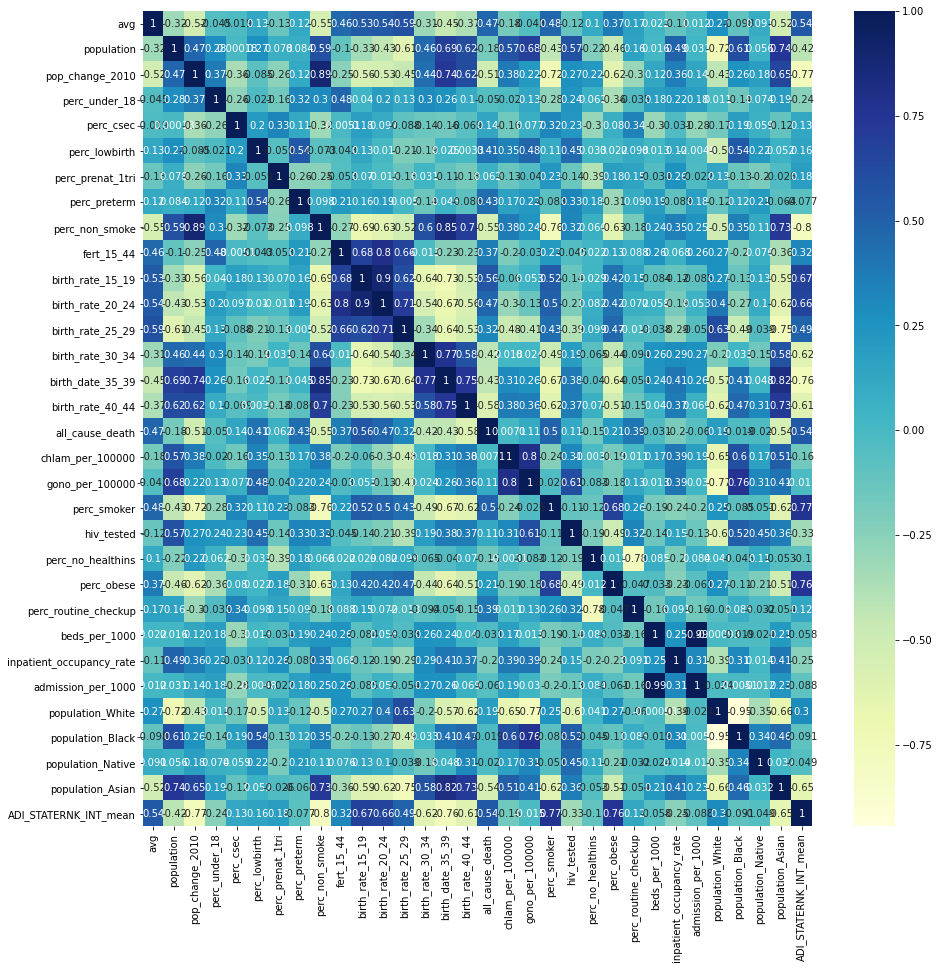

In [123]:
fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(merged_std.corr(), cmap="YlGnBu", annot=True)

In [196]:
y = merged_std['avg']
X = merged_std.drop(columns = ['avg'])

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_test

,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,birth_rate_15_19,...,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000,population_White,population_Black,population_Native,population_Asian,ADI_STATERNK_INT_mean
105,-0.342841,-0.763606,-0.527848,-1.994272,-0.219267,-1.729369,-1.350020,0.307742,-1.309313,-1.054606,...,1.127341,0.929108,-0.044870,-0.488024,-0.116743,0.407099,-0.325996,-0.821778,-0.289033,0.724827
127,-0.027000,0.629574,0.234835,0.487791,1.834498,-1.246112,1.187326,0.724245,-1.295694,-1.039519,...,0.107874,0.498595,-0.020323,0.109288,-0.022414,-2.032682,1.797076,2.211804,0.553576,-0.753497
129,2.393687,1.509477,0.921250,0.330698,-0.219267,0.531583,-0.715683,1.825004,-0.069935,-1.537368,...,-1.421327,0.068081,0.077865,0.720330,0.139015,-1.564926,0.920355,-0.376004,3.182920,-2.113442
42,-0.173855,-1.741276,0.044165,-1.805761,1.321057,0.531583,1.006087,-0.688891,0.039022,0.227732,...,1.127341,0.929108,0.421523,-0.240860,0.189097,0.291734,-0.091527,-1.288467,-0.532947,1.209415
3,-0.273457,0.947317,0.349238,-0.266254,0.294175,-0.020711,0.462370,0.709370,-0.260608,-0.330462,...,-0.656726,-1.653973,-0.363980,0.912568,-0.246081,0.249109,-0.445089,0.319799,-0.403510,-1.391477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.055896,1.900545,-1.633738,-1.774342,-1.451526,0.151881,-1.531259,1.349000,-3.529298,-2.065389,...,-0.146993,-1.653973,-0.143058,0.068094,-0.072982,-0.431287,-0.115173,-0.827260,2.446138,-1.179979
107,-0.491781,-0.396980,0.806848,-1.240228,0.499551,-0.676560,-0.534444,-0.450889,1.223922,0.559631,...,1.637074,-0.362432,-0.069417,-0.529218,-0.246567,0.831584,-0.644193,-0.987471,-0.632781,1.065600
33,1.651169,0.678458,0.463640,1.493183,0.191486,0.065585,0.009273,1.423376,-0.560238,-1.688231,...,-1.676194,0.929108,-0.192152,1.104806,-0.097294,-0.625066,-0.035028,-0.459315,1.708148,-2.317705
21,-0.204498,-0.445863,0.463640,-1.554413,-0.732708,0.635138,-0.987542,-0.376513,0.120739,0.650149,...,-0.146993,0.498595,0.298788,0.946897,0.368517,0.542345,-0.404271,0.256015,-0.462735,0.829481


In [198]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train))) #getting MSE for train data


lm_MSE = mean_squared_error(y_test, lm.predict(X_test)) #getting MSE for test data
print("Testing R-squared: ", lm.score(X_test, y_test)) #printing R-squared for test data
print("Test MSE: %.2f"% lm_MSE) #printing test MSE

cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #creating k-fold cross validation object
score_lm = cross_val_score(lm, X_train, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting CV scores for linear regression
lm_MSE_CV = np.abs(np.mean(score_lm)) #getting average CV error for linear regression
print("Linear Regression CV error:", lm_MSE_CV) #printing average CV error for linear regression

Train R-squared:  0.7507846614172433
Train MSE: 0.26
Testing R-squared:  0.5930068904551627
Test MSE: 0.35
Linear Regression CV error: 0.5067530440812884


In [199]:
from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression(normalize=True) #creating model object
predictors = X_train.columns.values #saving column names of predictors
CV_scores = [] #creating empty list to score average CV errors

for i in range(1, np.shape(X_train)[1]): #looping through n-1 features
    print("Num Features:",i)
    sfs = SequentialFeatureSelector(model, 
                                    n_features_to_select = i, 
                                    direction="forward",
                                    scoring='neg_mean_squared_error',
                                    cv=10) 
    sfs = sfs.fit(X_train, y_train) #selecting i features using training data
    print("\tFeatures selected:", list(predictors[sfs.get_support()])) #getting selected features for given i
    x_subset = sfs.transform(X_train) #transforming predictors dataframe based on selected features
    CV_error = np.mean(cross_val_score(model, x_subset, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean cv score for linear regression fitted to training data with selected features
    CV_scores.append(CV_error) #appending average CV error to CV scores list
    print("\tCV_Error: %10.3f"%CV_error)

Num Features: 1
	Features selected: ['birth_rate_25_29']
	CV_Error:     -0.634
Num Features: 2
	Features selected: ['perc_lowbirth', 'birth_rate_25_29']
	CV_Error:     -0.560
Num Features: 3
	Features selected: ['perc_lowbirth', 'birth_rate_25_29', 'perc_smoker']
	CV_Error:     -0.530
Num Features: 4
	Features selected: ['perc_lowbirth', 'birth_rate_25_29', 'birth_rate_40_44', 'perc_smoker']
	CV_Error:     -0.522
Num Features: 5
	Features selected: ['perc_lowbirth', 'perc_non_smoke', 'birth_rate_25_29', 'birth_rate_40_44', 'perc_smoker']
	CV_Error:     -0.516
Num Features: 6
	Features selected: ['perc_lowbirth', 'perc_non_smoke', 'birth_rate_25_29', 'birth_date_35_39', 'birth_rate_40_44', 'perc_smoker']
	CV_Error:     -0.503
Num Features: 7
	Features selected: ['perc_lowbirth', 'perc_non_smoke', 'birth_rate_25_29', 'birth_date_35_39', 'birth_rate_40_44', 'chlam_per_100000', 'perc_smoker']
	CV_Error:     -0.491
Num Features: 8
	Features selected: ['perc_lowbirth', 'perc_non_smoke', 'bir

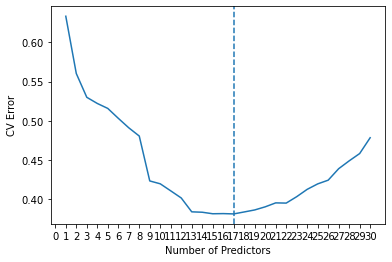

In [200]:
CV_scores =np.abs(CV_scores) #get the absolute value of the CV errors since we used negative MSE above
MSE_LR = np.min(CV_scores) #save the lowest MSE

x_graph = list(range(1,len(predictors))) #store range of features
best_CV = (np.where(CV_scores == np.min(CV_scores))[0])+1 #storing lowest CV error
plt.plot(x_graph,CV_scores) #plotting CV error for each # of features
plt.xlabel("Number of Predictors") #labeling x axis
plt.xticks(range(len(predictors))) #specifying x ticks
plt.ylabel("CV Error") #labeling y axis
plt.axvline(x=best_CV,linestyle='--') #adding vertical line for lowest CV error
plt.show() #showing plot

In [201]:
X_train_fs = X_train[['pop_change_2010', 'perc_under_18', 'perc_csec', 'perc_preterm', 'perc_non_smoke', 'fert_15_44', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'birth_rate_40_44', 'all_cause_death', 'chlam_per_100000', 'gono_per_100000', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'perc_routine_checkup', 'inpatient_occupancy_rate', 'population_White', 'population_Black', 'population_Native', 'ADI_STATERNK_INT_mean']]

X_test_fs = X_test[['pop_change_2010', 'perc_under_18', 'perc_csec', 'perc_preterm', 'perc_non_smoke', 'fert_15_44', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39', 'birth_rate_40_44', 'all_cause_death', 'chlam_per_100000', 'gono_per_100000', 'perc_smoker', 'hiv_tested', 'perc_no_healthins', 'perc_routine_checkup', 'inpatient_occupancy_rate', 'population_White', 'population_Black', 'population_Native', 'ADI_STATERNK_INT_mean']]

In [202]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train_fs, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train_fs, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train_fs))) #getting MSE for train data


lm_MSE = mean_squared_error(y_test, lm.predict(X_test_fs)) #getting MSE for test data
print("Testing R-squared: ", lm.score(X_test_fs, y_test)) #printing R-squared for test data
print("Test MSE: %.2f"% lm_MSE) #printing test MSE

Train R-squared:  0.7427768289600866
Train MSE: 0.27
Testing R-squared:  0.5679673098615432
Test MSE: 0.37


In [203]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
feature_names=X_train.columns.values #storing feature names

model_ridge = Ridge(normalize=True) #creating ridge model object
errors= [] #empty list to store errors
coef = [] #empty list to store coefficient estimates for graphing 


alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_ridge.set_params(alpha=a) #setting alpha parameter for ridge model
    model_ridge.fit(X_train, y_train) #fitting model to training data
    CV_error = np.mean(cross_val_score(model_ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting average CV error for specific alpha using training data
    errors.append(CV_error) #storing average CV error in list
    coef.append(model_ridge.coef_) #storing coefficient estimates in list for graphing later
    
errors = np.abs(errors) #storing absolute value of errors bc we used neg MSE above
print("Min error: ", np.min(errors)) #printing min CV error
ridge_ME = np.min(errors) #storing min error for model selection later
index_ME = (np.where(errors == np.min(errors))[0]) #storing index for min CV error to get best alpha
print("Best alpha: ", alphas[index_ME]) #printing best alpha

Min error:  0.4404877557630149
Best alpha:  [0.02578524]


In [204]:
model_lasso = Lasso(normalize=True, max_iter = 10000) #creating lasso model object
errors_lasso = [] #empty list to store errors
coef_lasso = [] #empty list to store coefficient estimates for graphing 

alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_lasso.set_params(alpha=a) #setting model parameter to specific alpha
    model_lasso.fit(X_train, y_train) #fitting lasso model to training data
    CV_error = np.mean(cross_val_score(model_lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean CV error using training data
    errors_lasso.append(CV_error) #appending mean CV error to list for graphing
    coef_lasso.append(model_lasso.coef_) #appending coefficient weights to list for graphing
    
errors_lasso = np.abs(errors_lasso) #getting asbolute value since negative MSE is used above
print("Min error: ", np.min(errors_lasso)) #printing min error
lasso_ME = np.min(errors_lasso) #storing min error
lasso_index_ME = (np.where(errors_lasso == np.min(errors_lasso))[0])
#storing index of min error to get best alpha
print("Best alpha: ", alphas[lasso_index_ME]) #getting best alpha using index stored in line above

Min error:  0.4426951833752403
Best alpha:  [0.00059235]


In [205]:
model_ridge.set_params(alpha=alphas[index_ME]) #set params for ridge using best alpha
y_pred = model_ridge.predict(X_test) #predict y using x test data
MSE_test_ridge = mean_squared_error(y_test, y_pred) #get test MSE
print("Ridge Regression Test MSE:", MSE_test_ridge)

model_lasso.set_params(alpha=alphas[lasso_index_ME]) #set params for ridge using best alpha
y_pred = model_lasso.predict(X_test) #predict y using x test data
MSE_test_lasso = mean_squared_error(y_test, y_pred) #get test MSE
print("Ridge Regression Test MSE:", MSE_test_lasso)

Ridge Regression Test MSE: 0.8920018126437324
Ridge Regression Test MSE: 0.8920775372537492


In [206]:
print('Avg CV MSE for Linear Regression: %.4f'% lm_MSE_CV)
print('Lowest SFS Linear Regression CV MSE, 17 features: %.4f'% MSE_LR)
print('Lowest Ridge CV MSE with best alpha: %.4f'% ridge_ME)
print('Lowest Lasso CV MSE with best alpha: %.4f'% lasso_ME)

Avg CV MSE for Linear Regression: 0.5068
Lowest SFS Linear Regression CV MSE, 17 features: 0.3808
Lowest Ridge CV MSE with best alpha: 0.4405
Lowest Lasso CV MSE with best alpha: 0.4427


In [211]:
lm = LinearRegression() #create linear reg object
lm.fit(X_train, y_train) #fitting to training data
lm_model_pred_y = lm.predict(X_test) #using fit model to predict y for test data
lm_model_test_MSE = mean_squared_error(lm_model_pred_y, y_test) #get test MSE
print("Linear Regression Test MSE:", lm_model_test_MSE)

#poly = PolynomialFeatures(degree=2) #polynomial transformation object
#x_poly_train = poly.fit_transform(data_train_x) #transform x train data
#x_poly_test = poly.fit_transform(data_test_x) #transform x test data
#lm.fit(x_poly_train, data_train_y) #fit the model using polynomial x data
#poly_pred_y = lm.predict(x_poly_test) # predict y test using transformed x data using fitted model
#poly_test_MSE = mean_squared_error(poly_pred_y, data_test_y) #get test MSE
#print("Polynomial Regression Test MSE:", poly_test_MSE)

sfs = SequentialFeatureSelector(model, 
                                n_features_to_select = 17, 
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv=10) #create SFS using n=17
sfs = sfs.fit(X_train, y_train) #selecting 5 features using training data
x_subset = sfs.transform(X_train) #transforming x train data
x_subset_test = sfs.transform(X_test) #transforming x test data
lm_sfs.fit(x_subset, y_train) #fitting SFS linear model using transformed x train data
y_pred = lm_sfs.predict(x_subset_test) #predict y test using transformed x data and fitted model
sfs_MSE = mean_squared_error(y_pred, y_test) #get test MSE
print("SFS Linear Regression Test MSE:", sfs_MSE)

model_ridge.set_params(alpha=alphas[index_ME]) #set params for ridge using best alpha
y_pred = model_ridge.predict(X_test) #predict y using x test data
MSE_test_ridge = mean_squared_error(y_test, y_pred) #get test MSE
print("Ridge Regression Test MSE:", MSE_test_ridge)

model_lasso.set_params(alpha=alphas[lasso_index_ME]) #set params for ridge using best alpha
y_pred = model_lasso.predict(X_test) #predict y using x test data
MSE_test_lasso = mean_squared_error(y_test, y_pred) #get test MSE
print("Lasso Regression Test MSE:", MSE_test_lasso)

Linear Regression Test MSE: 0.35165059086212735
SFS Linear Regression Test MSE: 0.46383023369759496
Ridge Regression Test MSE: 0.8920018126437324
Lasso Regression Test MSE: 0.8920775372537492


In [175]:
model_ridge.coef_

unstd_coefs = []

for i in range(len(model_ridge.coef_)):
    unstd_coefs.append((model_ridge.coef_[i] + merged.mean()[i])*merged.std()[i])
    print(merged.columns[i],':', (model_ridge.coef_[i] + merged.mean()[i])*merged.std()[i])

avg : 123.21701741872329
population : 48480708121.90029
pop_change_2010 : -9.311173960920504
perc_under_18 : 49.78264428128292
perc_csec : 96.59095375501656
perc_lowbirth : 7.316829989565066
perc_prenat_1tri : 438.7232350545143
perc_preterm : 10.030687808537625
perc_non_smoke : 557.5160723997484
fert_15_44 : 423.0207993517344
birth_rate_15_19 : 109.30750841397766
birth_rate_20_24 : 2139.332043574928
birth_rate_25_29 : 2017.5718824396588
birth_rate_30_34 : 1327.0611421525984
birth_date_35_39 : 436.6915268967568
birth_rate_40_44 : 16.953266567610218
all_cause_death : 59740.27248635718
chlam_per_100000 : 40473.93656111393
gono_per_100000 : 2449.7539886350683
perc_smoker : 84.01142189075979
hiv_tested : 208.3095356324711
perc_no_healthins : 26.341462449513127
perc_obese : 135.6659693737569
perc_routine_checkup : 201.71694439036213
beds_per_1000 : 8.892291502603216
inpatient_occupancy_rate : 716.7306651028268
admission_per_1000 : 19971.87582875053
population_White : 0.07375467554370359
popu

In [176]:
import statsmodels.api as sm

In [183]:
model = sm.OLS(y_train, X_train)
results = model.fit_regularized(method='elastic_net', alpha=alphas[index_ME], L1_wt=0.0)
summary = results.summary()
print(summary)

NotImplementedError: 

In [212]:
%pip install regressors
from regressors import stats    
stats.coef_pval(lm, X_train, y_train)

Note: you may need to restart the kernel to use updated packages.


array([9.16353744e-01, 1.52902070e-02, 1.39216744e-01, 5.53170367e-01,
       4.08277160e-01, 5.42237728e-01, 5.66314066e-01, 5.43732784e-01,
       1.66205779e-03, 1.03130194e-02, 9.24216050e-01, 1.11680972e-01,
       8.21565038e-15, 4.79863718e-03, 3.02236224e-04, 4.87714594e-02,
       1.57276093e-02, 2.13985239e-03, 1.00813694e-01, 4.13019495e-01,
       5.43712862e-03, 2.04503081e-13, 5.58332712e-01, 1.47937225e-08,
       8.96922577e-01, 8.66235289e-05, 8.42405402e-01, 3.93005264e-04,
       1.46157505e-04, 1.28659597e-03, 4.12233275e-01, 2.56972119e-02])

In [222]:
stats.summary(lm_sfs, x_subset, y_train)


Residuals:
    Min      1Q  Median     3Q    Max
-1.8038 -0.2535  0.0206 0.2106 1.8619


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.005280    0.045791   0.1153  0.908349
x1          0.257454    0.100310   2.5666  0.011256
x2         -0.353792    0.119958  -2.9493  0.003699
x3         -0.099660    0.066016  -1.5096  0.133254
x4          0.012781    0.054276   0.2355  0.814165
x5         -0.445863    0.136302  -3.2711  0.001331
x6         -0.293520    0.137971  -2.1274  0.035033
x7         -0.379135    0.151505  -2.5025  0.013413
x8          0.353047    0.159719   2.2104  0.028600
x9          0.972117    0.092641  10.4934  0.000000
x10         0.547200    0.145431   3.7626  0.000241
x11        -0.205729    0.083198  -2.4728  0.014531
x12         0.187422    0.066647   2.8121  0.005585
x13        -0.061648    0.072459  -0.8508  0.396244
x14         0.581172    0.069020   8.4203  0.000000
x15         0.394629    0.068888   5.7285  0.000000
x16         0

In [223]:
stats.summary(lm, X_train, y_train)

Residuals:
    Min      1Q  Median   3Q    Max
-1.3941 -0.2191   0.015 0.25 1.6435


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.004475    0.042532   0.1052  0.916354
x1          0.334465    0.136308   2.4538  0.015290
x2         -0.195738    0.131663  -1.4867  0.139217
x3         -0.042696    0.071835  -0.5944  0.553170
x4         -0.056375    0.067981  -0.8293  0.408277
x5          0.047229    0.077319   0.6108  0.542238
x6         -0.035755    0.062207  -0.5748  0.566314
x7          0.049895    0.081987   0.6086  0.543733
x8         -0.531867    0.166041  -3.2032  0.001662
x9         -0.689238    0.265278  -2.5982  0.010313
x10         0.016527    0.173443   0.0953  0.924216
x11         0.430385    0.268963   1.6002  0.111681
x12         0.903516    0.104604   8.6375  0.000000
x13         0.343880    0.120103   2.8632  0.004799
x14         0.661906    0.178873   3.7004  0.000302
x15        -0.189635    0.095444  -1.9869  0.048771
x16        -0.240